<a href="https://colab.research.google.com/github/abbyambita/Diagnosing-COVID-from-CT-Scan-Images/blob/main/tsne_acgan_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import os 

os.chdir("/content/gdrive/My Drive")

!ls  '/content/gdrive/My Drive/CS 284 Mini-Project/Code'

%cd "/content/gdrive/My Drive/CS 284 Mini-Project/Code"

 ACGAN.ipynb		    new_sars_cov
 acgan_output_images	    output_result
 BAGAN.ipynb		    plots
 build_datasets.ipynb	    revised-git
 build_datasets_v2.ipynb    revised-kaggle-validation
 build_datasets_v3.ipynb    runs
 COVID-CT-master	   'synthetic images'
'data (can be discarded)'   training-from-scratch-git.ipynb
 DCGAN.ipynb		   'transfer learning models (backup trash)'
 ECN_git.ipynb		    transfer_learning_models_git.ipynb
 ECN_kaggle.ipynb	    transfer_learning_models_kaggle.ipynb
 EN_git.ipynb		    transfer_learning_with_acgan_git.ipynb
 EN_kaggle.ipynb	    transfer_learning_with_acgan_kaggle.ipynb
 images.zip		    trial_acgan_git.ipynb
 Inception_github.ipynb     trial_acgan_kaggle.ipynb
 master.ipynb		    trial_GAN.ipynb
 model_backup		    trial.ipynb
 model_result		    tsne_acgan_git.ipynb
 models			    tsne_acgan_kaggle.ipynb
/content/gdrive/.shortcut-targets-by-id/1eVFVz23F6ROX0s10Oe3tT9HVzr502iW2/CS 284 Mini-Project/Code


In [3]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
import matplotlib.pyplot as plt
import torch
import time
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision
from collections import OrderedDict
from torch.autograd import Variable
from PIL import Image
import PIL
from torch.optim import lr_scheduler
import copy
import json
import os
from os.path import exists

plt.ion()

In [4]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

import collections

In [6]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for i,filename in enumerate(os.listdir(folder)):
        print(filename)
        # if(i==100):
        #   break
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (64,64))
        if img is not None:
            images.append(img)
    return np.array(images)



In [7]:
covid="revised-kaggle-validation/train/covid"
noncovid = "revised-kaggle-validation/train/noncovid"

covid_data = load_images_from_folder(covid)
noncovid_data = load_images_from_folder(noncovid)

2601.png
1645.png
717.png
738.png
1872.png
1641.png
344.png
1855.png
2612.png
722.png
345.png
740.png
2608.png
2603.png
1646.png
1627.png
2600.png
1626.png
2344.png
1640.png
2354.png
1867.png
2359.png
2613.png
1866.png
2097.png
1712.png
296.png
1724.png
1720.png
1136.png
1131.png
1717.png
278.png
1130.png
2095.png
1710.png
1150.png
2792.png
1137.png
2102.png
302.png
2796.png
287.png
1160.png
2791.png
274.png
553.png
1711.png
277.png
1152.png
1138.png
273.png
1726.png
541.png
2096.png
305.png
551.png
1134.png
534.png
2094.png
2099.png
2104.png
1142.png
1132.png
2109.png
288.png
2781.png
279.png
1128.png
1158.png
1143.png
532.png
555.png
542.png
290.png
1155.png
300.png
2788.png
1704.png
294.png
2092.png
1154.png
291.png
546.png
1129.png
1133.png
537.png
2790.png
1161.png
2098.png
1159.png
1706.png
272.png
547.png
1148.png
556.png
1157.png
2793.png
1126.png
2798.png
285.png
538.png
1162.png
298.png
1139.png
2093.png
306.png
543.png
1725.png
281.png
1715.png
295.png
1721.png
275.png
1702.

In [10]:
synthetic_covid_data = load_images_from_folder("acgan_output_images/kaggle/batch_size=32_lr=0.001_epochs=600/covid")
synthetic_noncovid_data = load_images_from_folder("acgan_output_images/kaggle/batch_size=32_lr=0.001_epochs=600/noncovid")

fake_samples_1000.png
fake_samples_1001.png
fake_samples_1002.png
fake_samples_1003.png
fake_samples_1004.png
fake_samples_1005.png
fake_samples_1006.png
fake_samples_1007.png
fake_samples_1008.png
fake_samples_1009.png
fake_samples_1010.png
fake_samples_1011.png
fake_samples_1012.png
fake_samples_1013.png
fake_samples_1014.png
fake_samples_1015.png
fake_samples_1016.png
fake_samples_1017.png
fake_samples_1018.png
fake_samples_1019.png
fake_samples_1020.png
fake_samples_1021.png
fake_samples_1022.png
fake_samples_1023.png
fake_samples_1024.png
fake_samples_1025.png
fake_samples_1026.png
fake_samples_1027.png
fake_samples_1028.png
fake_samples_1029.png
fake_samples_1030.png
fake_samples_1031.png
fake_samples_1032.png
fake_samples_1033.png
fake_samples_1034.png
fake_samples_1035.png
fake_samples_1036.png
fake_samples_1037.png
fake_samples_1038.png
fake_samples_1039.png
fake_samples_1040.png
fake_samples_1041.png
fake_samples_1042.png
fake_samples_1043.png
fake_samples_1044.png
fake_sampl

In [11]:
covid_labels = len(covid_data)*["covid"]
noncovid_labels = len(noncovid_data)*["noncovid"]

synthetic_covid_labels = len(synthetic_covid_data)*["synthetic_covid"]
synthetic_noncovid_labels = len(synthetic_noncovid_data)*["synthetic_noncovid"]

X = np.concatenate((covid_data,noncovid_data,synthetic_covid_data,synthetic_noncovid_data))
X = X/255.0
y = np.concatenate((covid_labels,noncovid_labels,synthetic_covid_labels,synthetic_noncovid_labels))

In [12]:
vol_shape = X.shape[1:]
n_voxels = np.prod(vol_shape)
X = X.reshape(X.shape[0], n_voxels)

print(X.shape)
print(y.shape)

(7021, 12288)
(7021,)


In [13]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (7021, 12290)


In [14]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
#df['pca-three'] = pca_result[:,2] 
#df['pca-four'] = pca_result[:,3] 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18408559 0.09360722]


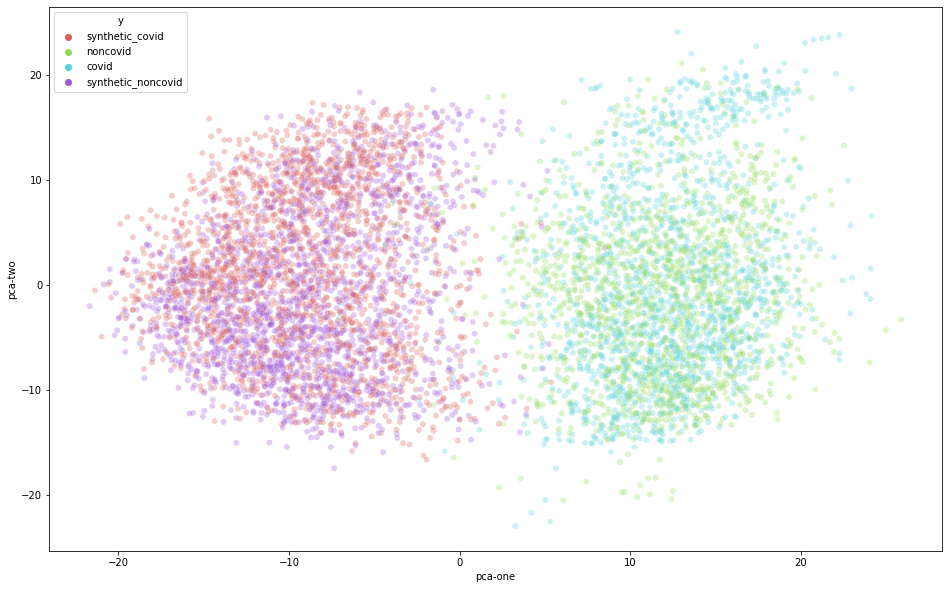

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette('hls', n_colors=4),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [17]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
#df_subset['pca-three'] = pca_result[:,2]
#df_subset['pca-four'] = pca_result[:,3]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18408559 0.09360722]


In [18]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7021 samples in 14.660s...
[t-SNE] Computed neighbors for 7021 samples in 1116.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7021
[t-SNE] Computed conditional probabilities for sample 2000 / 7021
[t-SNE] Computed conditional probabilities for sample 3000 / 7021
[t-SNE] Computed conditional probabilities for sample 4000 / 7021
[t-SNE] Computed conditional probabilities for sample 5000 / 7021
[t-SNE] Computed conditional probabilities for sample 6000 / 7021
[t-SNE] Computed conditional probabilities for sample 7000 / 7021
[t-SNE] Computed conditional probabilities for sample 7021 / 7021
[t-SNE] Mean sigma: 6.809201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.081673
[t-SNE] KL divergence after 300 iterations: 2.541323
t-SNE done! Time elapsed: 1160.9305803775787 seconds


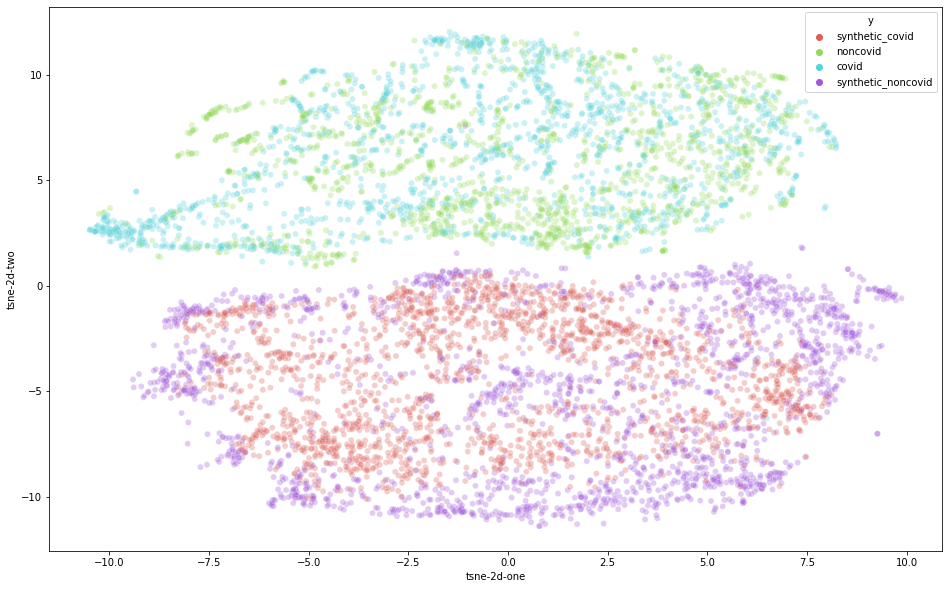

In [19]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette('hls', n_colors=4),
    data=df_subset,
    legend="full",
    alpha=0.3
)

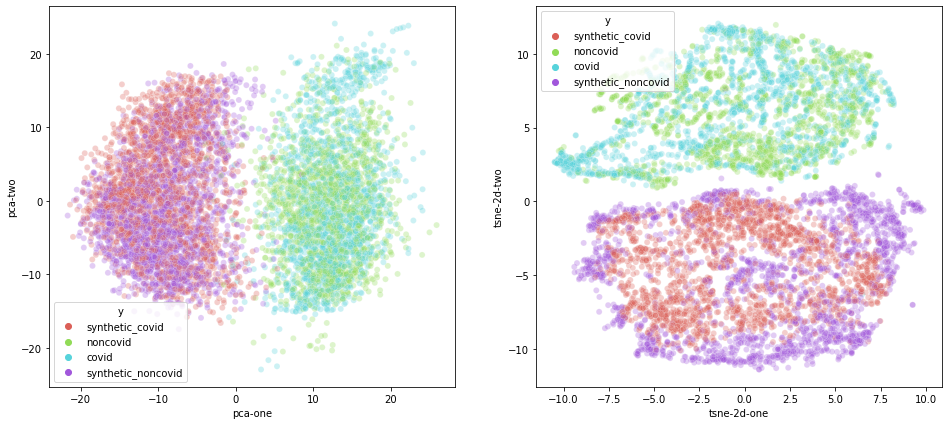

In [20]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)